<h2 align="center"> Multivariable Regression - Exercise </h2>

## Machine Learning - Andrew Ng ( Python Implementation)

## House Price Prediction

### Loading Data & Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [37]:
#loading the train and test data
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
y_train=data_train.iloc[:,-1].values
data_train.drop(["SalePrice"],axis=1,inplace=True)
data=pd.concat([df_train,df_test])

In [38]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [40]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [41]:
# Removing features with > 50% missing values
missing=data.isnull().sum()/len(data)
miss_features=missing.loc[missing>0.5].index
data.drop(miss_features,inplace=True,axis=1)
missing.head()

Id             0.000000
MSSubClass     0.000000
MSZoning       0.001370
LotFrontage    0.166495
LotArea        0.000000
dtype: float64

In [42]:
data_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359


In [43]:
# removing features that has <+-0.3 correlation coefficient from SalePrice
data.drop(["Id","YrSold","MoSold","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch","KitchenAbvGr",
         "BedroomAbvGr", "HalfBath","BsmtFullBath","BsmtHalfBath","LowQualFinSF","BsmtUnfSF","BsmtFinSF2","MSSubClass",
         "OverallCond", "LotArea"],inplace=True,axis=1)

In [44]:
# fillna
for bsmt in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
    data[bsmt].fillna("No",inplace=True)



data["FireplaceQu"].fillna("No",inplace=True)

for gar in ('GarageType', 'GarageFinish', 'GarageQual',"GarageYrBlt","GarageCond"):
    data[gar].fillna('No',inplace=True)
    
for gar1 in ('GarageCars', 'GarageArea'):
    data[gar1].fillna(0,inplace=True)

for ea in ("LotFrontage","MasVnrArea","TotalBsmtSF","BsmtFinSF1"):
    data[ea].fillna(data[ea].mean(),inplace=True)

for _ in ("MasVnrType","MSZoning","Utilities","Exterior1st","Exterior2nd","Functional","KitchenQual","SaleType","Electrical"):
    data[_].fillna(data[_].mode()[0],inplace=True)

In [45]:
# encoding categorical features
data=pd.get_dummies(data,columns=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
                              "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl",
                              "Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                              "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir",
                              "Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt","GarageFinish",
                              "GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"],
                  prefix=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood",
                          "Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                          "MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                          "BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional",
                          "FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive",
                          "SaleType","SaleCondition"],drop_first=True)

In [46]:
# Convert dataframe into X and y numpy array
X_train=data.iloc[:1460,:].values

X_test=data.iloc[1460:,:].values

In [48]:
X_train

array([[6.500e+01, 7.000e+00, 2.003e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.000e+01, 6.000e+00, 1.976e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 7.000e+00, 2.001e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.600e+01, 7.000e+00, 1.941e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 5.000e+00, 1.950e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.500e+01, 5.000e+00, 1.965e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [49]:
X_test

array([[8.000e+01, 5.000e+00, 1.961e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.100e+01, 6.000e+00, 1.958e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.400e+01, 5.000e+00, 1.997e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.600e+02, 5.000e+00, 1.960e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.200e+01, 5.000e+00, 1.992e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.400e+01, 7.000e+00, 1.993e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [50]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)

In [51]:
# add columns of ones to X
m,n=X_train.shape[0],X_train.shape[1]
X_train = np.append(np.ones((m,1)),X_train,axis=1)
theta=np.zeros((n+1,1))

In [52]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [53]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [57]:
# Run gradient descent
theta, J_history = gradientDescent(X_train,y_train.reshape(m,1),theta,0.01,4000)

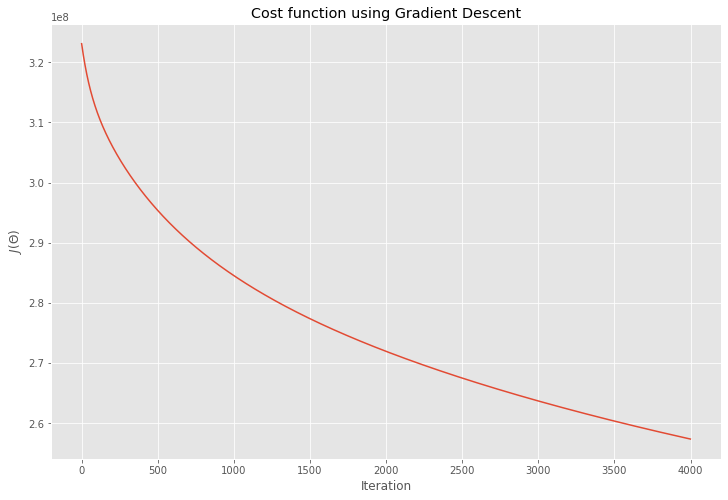

In [58]:
# visualize the cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent");

In [59]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(x,theta)
    
    return predictions

In [60]:
#feature normalisation of X_test values
X_test= sc_X.fit_transform(X_test)
X_test=np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)
predict=predict(X_test,theta)

In [62]:
X_test

array([[ 1.        ,  0.55005111, -0.75110125, ..., -0.13469875,
         0.46021084, -0.29936452],
       [ 1.        ,  0.59869904, -0.05487716, ..., -0.13469875,
         0.46021084, -0.29936452],
       [ 1.        ,  0.25816357, -0.75110125, ..., -0.13469875,
         0.46021084, -0.29936452],
       ...,
       [ 1.        ,  4.44188496, -0.75110125, ..., -0.13469875,
        -2.17291708, -0.29936452],
       [ 1.        , -0.3256115 , -0.75110125, ..., -0.13469875,
         0.46021084, -0.29936452],
       [ 1.        ,  0.25816357,  0.64134693, ..., -0.13469875,
         0.46021084, -0.29936452]])

In [63]:
predict

array([[ 94614.04435975],
       [159453.2193872 ],
       [183488.32794452],
       ...,
       [164727.04432219],
       [112334.4501851 ],
       [230731.91898062]])

In [64]:
# export as csv
np.savetxt("submission.csv",predict,fmt="%.1f")